# Feature Engineering Techniques For Titanic Dataset

In [1]:
# import packges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Cost Functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce

# Used for saving out models
import joblib
import datetime

In [2]:
# load the titanic dataset
df = sns.load_dataset("titanic")

In [3]:
# drop the duplicate columns and unused column
df = df.drop(['pclass','alive','embark_town','deck'], axis = 1)

# replacing missing values with mean for 'age' column
df['age'] = df['age'].replace(np.NaN, round(df['age'].mean()))

# Filling missing values using forward and backward fill for the 'embark_town' column
df["embarked"] = df["embarked"].fillna(method='ffill').fillna(method='bfill')

In [4]:
# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42)

In [5]:
# Model with only numeric features
train.dtypes

survived         int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class         category
who             object
adult_male        bool
alone             bool
dtype: object

In [6]:
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
test_numeric = cleaner(test)

In [7]:
# Create X, y train and validation sets

target = "survived"

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

# Logistic Regression model

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8044692737430168

In [9]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}

    # calculate the scores from sklearn.metrics package
    accuracy  = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall    = recall_score(y_true, y_predict)
    
    ls = [accuracy, precision, recall]
    ls2 = ["Accuracy_Score", "Precision_Score", "Recall_Score"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
# baseline model (Majority Class) was 0 
b_preds = [0 for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)

print("\nLogistic Regression")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline
Accuracy_Score: 0.6235955056179775
Precision_Score: 0.0
Recall_Score: 0.0

Logistic Regression
Accuracy_Score: 0.8258426966292135
Precision_Score: 0.7950819672131147
Recall_Score: 0.7238805970149254


# Feature Scaling
### Standard Scaler

In [10]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Look at the transformed data
X_train_scaled[:5]

array([[ 1.22453038, -0.47072241, -0.47934164, -0.07868358,  0.80507649,
         0.81220297],
       [-0.50801097, -0.47072241, -0.47934164, -0.37714494,  0.80507649,
         0.81220297],
       [ 0.18500557, -0.47072241, -0.47934164, -0.47486697,  0.80507649,
         0.81220297],
       [-0.27700546,  0.37992316, -0.47934164, -0.47623026,  0.80507649,
        -1.23121934],
       [-1.81704221,  2.93185988,  2.04874166, -0.02524937, -1.24211801,
        -1.23121934]])

In [11]:
# Train the model
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_test_scaled, y_test)

0.8044692737430168

In [12]:
res2 = calc_cost(y_test, lr2.predict(X_test_scaled))

Accuracy_Score: 0.8044692737430168
Precision_Score: 0.782608695652174
Recall_Score: 0.7297297297297297


### Robust Scaler

In [13]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_test_robust = scaler2.transform(X_test)

# Look at the transformed data
X_train_robust[:5]

array([[ 1.19230769,  0.        ,  0.        ,  0.62218383,  0.        ,
         0.        ],
       [-0.53846154,  0.        ,  0.        , -0.06441639,  0.        ,
         0.        ],
       [ 0.15384615,  0.        ,  0.        , -0.28922259,  0.        ,
         0.        ],
       [-0.30769231,  1.        ,  0.        , -0.2923588 ,  0.        ,
        -1.        ],
       [-1.84615385,  4.        ,  2.        ,  0.74510742, -1.        ,
        -1.        ]])

In [14]:
# Train the model
lr3 = LogisticRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_test_robust, y_test)

0.8044692737430168

In [15]:
res3 = calc_cost(y_test, lr3.predict(X_test_robust))

Accuracy_Score: 0.8044692737430168
Precision_Score: 0.782608695652174
Recall_Score: 0.7297297297297297


### Min Max Scaler

In [16]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_test_mm = scaler3.transform(X_test)

# Look at the transformed data
X_train_mm[:5]

array([[0.56647399, 0.        , 0.        , 0.0556283 , 1.        ,
        1.        ],
       [0.28373963, 0.        , 0.        , 0.02537431, 1.        ,
        1.        ],
       [0.39683338, 0.        , 0.        , 0.01546857, 1.        ,
        1.        ],
       [0.32143755, 0.125     , 0.        , 0.01533038, 1.        ,
        0.        ],
       [0.07011812, 0.5       , 0.33333333, 0.06104473, 0.        ,
        0.        ]])

In [17]:
# Train the model
lr4 = LogisticRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_test_mm, y_test)

0.7988826815642458

In [18]:
res4 = calc_cost(y_test, lr4.predict(X_test_mm))

Accuracy_Score: 0.7988826815642458
Precision_Score: 0.7714285714285715
Recall_Score: 0.7297297297297297


### One Hot Encoding

In [19]:
train.describe(exclude="number")

,sex,embarked,class,who,adult_male,alone
count,712,712,712,712,712,712
unique,2,3,3,3,2,2
top,male,S,Third,man,True,True
freq,467,525,398,432,432,429


In [20]:
# Extract Date Times

# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["class", "who", "embarked"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_test = one_hot.transform(test[col_names]).toarray()

In [21]:
# Look at the categories
one_hot.categories_

[array(['First', 'Second', 'Third'], dtype=object),
 array(['child', 'man', 'woman'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [22]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

In [23]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["class", "who", "embarked"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [24]:
# Values for each row
one_hot_df

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [25]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names)

oh_df_test = pd.DataFrame(
    one_hot_df_test,
    index=test.index,
    columns = column_names)

print(oh_df.shape)
print(oh_df_test.shape)

(712, 9)
(179, 9)


In [26]:
# Create train_new df by mergind train and one hot encoded df together and drop "class", "who" cols
train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["class", "who", "embarked"], axis=1)
test_new = test.merge(oh_df_test, on=test.index).set_index("key_0").drop(["class", "who", "embarked"], axis=1)

print(train_new.shape)
print(test_new.shape)

(712, 17)
(179, 17)


### Ordinal Encoder 

In [27]:
ordinal = OrdinalEncoder()

col_names = ["sex"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_test = ordinal.transform(test[col_names])

In [28]:
# Look at categories
ordinal.categories_

[array(['female', 'male'], dtype=object)]

In [29]:
# Add oridnally encoded column to the data
train_new["sex"] = ordinal_ls
test_new["sex"] = ordinal_ls_test

#### Model Using One Hot and Ordinally Encoded Features

In [30]:
target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_test = test_new.drop(target, axis=1)
y_test = test_new[target]

In [31]:
lr5 = LogisticRegression()

lr5.fit(X_train, y_train)
lr5.score(X_test, y_test)

0.8100558659217877

In [32]:
res4 = calc_cost(y_test, lr5.predict(X_test))

Accuracy_Score: 0.8100558659217877
Precision_Score: 0.7941176470588235
Recall_Score: 0.7297297297297297


## Combining Feature Scaling and Feature Engineering

In [33]:
# Make a model with scaled and engineered features

# Change column order to make addition of scaled features easier
col_order_ls = ['age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone', 'sex', 'class_First', 'class_Second',
                'class_Third', 'who_child', 'who_man', 'who_woman', 'embarked_C', 'embarked_Q', 'embarked_S']

# Re order columns
X_train = X_train[col_order_ls]
X_test = X_test[col_order_ls]

# Replace column values with values from scaled data
X_train[['age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']] = X_train_scaled
X_test[['age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']] = X_test_scaled

print(X_train.shape)

(712, 16)


In [34]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_train.shape[0] == sum(X_train.index == y_train.index)

True

In [35]:
# Model
lr6 = LogisticRegression()

lr6.fit(X_train, y_train)
lr6.score(X_test, y_test)

0.8100558659217877

In [36]:
res5 = calc_cost(y_test, lr6.predict(X_test))

Accuracy_Score: 0.8100558659217877
Precision_Score: 0.7941176470588235
Recall_Score: 0.7297297297297297


## Percent Decrease in the Cost Function

In [37]:
delta_Accuracy_Score = ((res1['Accuracy_Score']- res5['Accuracy_Score'])/res1['Accuracy_Score'])*100
delta_Precision_Score = ((res1['Precision_Score']- res5['Precision_Score'])/res1['Precision_Score'])*100
delta_Recall_Score = ((res1['Recall_Score']- res5['Recall_Score'])/res1['Recall_Score'])*100

delta_ls = [round(delta_Accuracy_Score), round(delta_Precision_Score), round(delta_Recall_Score)]
delta_ls2 = ["Accuracy Score % decrease", "Precision Score % decrease", "Recall Score % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        

Accuracy Score % decrease: 2
Precision Score % decrease: 0
Recall Score % decrease: -1


# Saving and Loading

In [38]:
# Save the model as todays date
today = str(datetime.datetime.today())[:10].replace("-", "_")

joblib.dump(scaler, f"C:\\Users\\-\\Downloads\\Feature_Engineering\\scaler_{today}")
joblib.dump(one_hot, f"C:\\Users\\-\\Downloads\\Feature_Engineering\\one_hot_{today}")
joblib.dump(ordinal, f"C:\\Users\\-\\Downloads\\Feature_Engineering\\ordinal_{today}")
joblib.dump(lr6, f"C:\\Users\\-\\Downloads\\Feature_Engineering\\model_{today}")

['C:\\Users\\-\\Downloads\\Feature_Engineering\\model_2021_06_22']

## Final Results

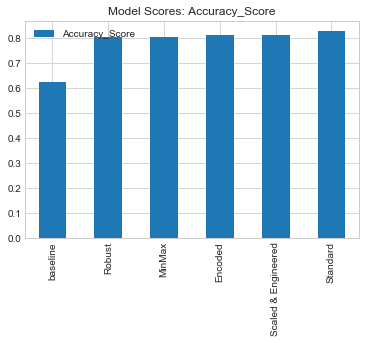

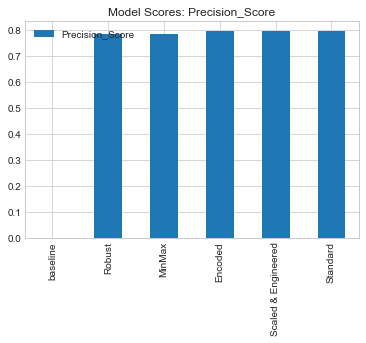

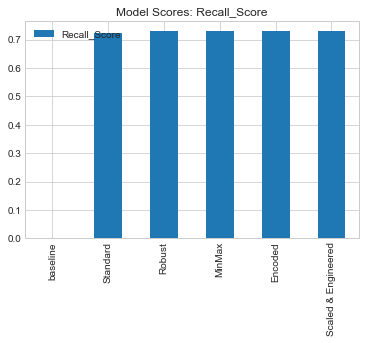

In [39]:
model_ls = ["baseline", "Standard", "Robust", "MinMax", "Encoded", "Scaled & Engineered"]
result_ls = [res0, res1, res2, res3, res4, res5]

res_df = pd.DataFrame(result_ls, index=model_ls)

for x in ["Accuracy_Score", "Precision_Score", "Recall_Score"]:
    res_df.loc[:,res_df.columns == x].sort_values(by=x).plot(kind="bar", title=f"Model Scores: {x}")